<a href="https://colab.research.google.com/github/mmehtafenil/Car-Brand-Classification/blob/main/Car_Brand_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!unrar x '/content/drive/My Drive/Data Science Projects/Car Brand Classification/Datasets.rar' '/content/Dataset/'

Mounted at /content/drive

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/Data Science Projects/Car Brand Classification/Datasets.rar

Creating    /content/Dataset                                          OK
Creating    /content/Dataset/Datasets                                 OK
Creating    /content/Dataset/Datasets/Test                            OK
Creating    /content/Dataset/Datasets/Test/audi                       OK
Extracting  /content/Dataset/Datasets/Test/audi/21.jpg                     1%  OK 
Extracting  /content/Dataset/Datasets/Test/audi/22.jpg                     1%  OK 
Extracting  /content/Dataset/Datasets/Test/audi/23.jpg                     2%  OK 
Extracting  /content/Dataset/Datasets/Test/audi/24.jpg                     4%  OK 
Extracting  /content/Dataset/Datasets/Test/audi/25.jpg                     5%  OK 
Extracting  /content/Dataset/Datasets/Test/audi/26.j

In [2]:
IMAGE_SIZE = [224, 224]

train_path = '/content/Dataset/Datasets/Train'
valid_path = '/content/Dataset/Datasets/Test'

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import *
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from glob import glob

In [4]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)


94773248/94765736 [==============================] - 1s 0us/step


In [5]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
for layer in resnet.layers:
  layer.trainable = False

In [7]:
folders = glob('/content/Dataset/Datasets/Train/*')

In [8]:
len(folders)

3

In [9]:
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation = 'softmax')(x)

model = Model(resnet.input, prediction)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('/content/Dataset/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/Dataset/Datasets/Test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [16]:
r = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/50
2/2 [==============================] - 24s 15s/step - loss: 4.3591 - accuracy: 0.2500 - val_loss: 6.7630 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 19s 14s/step - loss: 9.4713 - accuracy: 0.3542 - val_loss: 4.0742 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 19s 14s/step - loss: 4.6951 - accuracy: 0.4583 - val_loss: 4.3539 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 19s 14s/step - loss: 4.1467 - accuracy: 0.3333 - val_loss: 3.6925 - val_accuracy: 0.2759
Epoch 5/50
2/2 [==============================] - 19s 14s/step - loss: 3.4596 - accuracy: 0.3958 - val_loss: 2.2121 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 19s 14s/step - loss: 1.8310 - accuracy: 0.4479 - val_loss: 4.3721 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 19s 14s/step - loss: 2.7998 - accuracy: 0.4375 - val_loss: 3.6088 - val_accuracy: 0.2414
Epoch 8/50
2/2 [===========

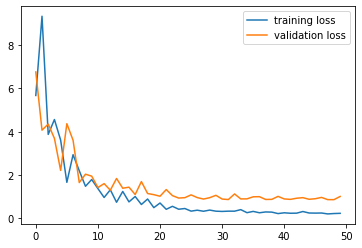

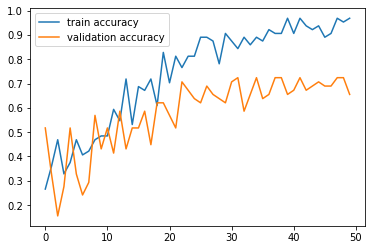

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(r.history['loss'], label = 'training loss')
plt.plot(r.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label = 'train accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
from keras.models import load_model

model.save('model_resnet50.h5')

In [19]:
y_pred = model.predict(test_set)

In [20]:
y_pred

array([[8.0591285e-01, 5.9908267e-02, 1.3417894e-01],
       [2.2003658e-02, 7.0638046e-02, 9.0735829e-01],
       [2.1654137e-03, 1.2183774e-02, 9.8565084e-01],
       [6.0870633e-03, 1.1889801e-03, 9.9272400e-01],
       [2.4455898e-02, 5.2031964e-01, 4.5522448e-01],
       [4.4989925e-02, 2.8873417e-01, 6.6627592e-01],
       [5.3119976e-02, 5.2371465e-02, 8.9450854e-01],
       [1.6300710e-06, 2.3373596e-04, 9.9976462e-01],
       [3.9948454e-01, 1.0204168e-01, 4.9847379e-01],
       [2.4152201e-02, 2.2838065e-01, 7.4746710e-01],
       [1.5962441e-02, 3.6814237e-01, 6.1589515e-01],
       [7.8277534e-01, 7.5754441e-02, 1.4147025e-01],
       [3.3902747e-06, 5.5620127e-05, 9.9994099e-01],
       [2.3284359e-02, 1.3416435e-01, 8.4255123e-01],
       [1.3002677e-02, 9.0583153e-02, 8.9641416e-01],
       [2.6393420e-01, 6.3111693e-01, 1.0494888e-01],
       [8.6153280e-03, 9.3877321e-01, 5.2611511e-02],
       [6.2927715e-03, 8.8957530e-01, 1.0413190e-01],
       [2.5875593e-02, 5.233

In [21]:
y_pred = np.argmax(y_pred, axis = 1)

In [22]:
y_pred

array([0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2])

In [23]:
from keras.models import load_model
from keras.preprocessing import image

In [24]:
model = load_model('model_resnet50.h5')

In [25]:
img = image.load_img('/content/Dataset/Datasets/Test/lamborghini/11.jpg', target_size = (224, 224))

In [26]:
x = image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [27]:
x.shape

(224, 224, 3)

In [28]:
x = x/225

In [29]:
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
img_data.shape
img_data

array([[[[-102.819   , -115.659   , -122.56    ],
         [-102.819   , -115.659   , -122.56    ],
         [-102.819   , -115.659   , -122.56    ],
         ...,
         [-103.17456 , -115.94789 , -122.80889 ],
         [-103.08122 , -115.85455 , -122.71555 ],
         [-102.96567 , -115.739   , -122.6     ]],

        [[-102.819   , -115.659   , -122.56    ],
         [-102.819   , -115.659   , -122.56    ],
         [-102.819   , -115.659   , -122.56    ],
         ...,
         [-102.885666, -115.69011 , -122.59111 ],
         [-102.89456 , -115.699   , -122.6     ],
         [-102.899   , -115.703445, -122.60445 ]],

        [[-102.819   , -115.659   , -122.56    ],
         [-102.819   , -115.659   , -122.56    ],
         [-102.819   , -115.659   , -122.56    ],
         ...,
         [-102.836784, -115.67233 , -122.613335],
         [-102.82789 , -115.663445, -122.60445 ],
         [-102.82789 , -115.663445, -122.60445 ]],

        ...,

        [[-102.92123 , -115.859   , -1

In [30]:
model.predict(img_data)

array([[0.00182233, 0.00188574, 0.996292  ]], dtype=float32)

In [31]:
a = np.argmax(model.predict(img_data), axis = 1)

In [32]:
a == 1

array([False])